# Final Perform

This is the final perform. This notebook is serves as a template for how you should structure your final submission. There are no autograded tests for this Perform. You should also feel free to add more cells and move sections around if you believe it will improve the cohesion of the assignment.

The data is in RateMyProfessorSampleData.zip. You will need to unzip the file to access the data files. The data is a [sample data dump from RateMyProfessor.com](https://data.mendeley.com/datasets/fvtfjyvw7d/2).

When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct before saving and submitting your .ipynb file (the notebook file) on gradescope. There is no autograder for this Perform. It is entirely manually graded.

In [1]:
# Run this code cell to import relevant libraries
# Feel free to add any other libraries here or later in your notebook
# Please update to seaborn v0.11 for this assignment
# check version: print(sns.__version__)

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

print(sns.__version__)

AttributeError: module 'seaborn' has no attribute 'set_theme'

# Introduction

*Add text here if you would like to provide an introduction to your analysis that will add to the notebook's cohesion*

# Data Processing

This section should have all of your data loading and cleaning code where you load and create your DataFrame(s). It does not need to contain all of the data processing code if creating a new column or table in a later section makes more sense for explanation and cohesion.

In [24]:
# Load all data into one dataframe
import glob
all_data = pd.DataFrame()
for fname in glob.glob('RateMyProfessorSampleData/*.csv'):
    all_data = pd.concat([all_data, pd.read_csv(fname)])
all_data = all_data.reset_index(drop=True)

In [34]:
all_data.head(10)

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments
0,Robert Olshansky,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,0.0,3.5,NaN,2.0,NaN,...,3.5,2.0,NaN,NaN,NaN,NaN,NaN,0,0,"Good guy, laid back and interested in his fiel..."
1,Marshall Levett,Austin Community College,Counseling department,Austin,TX,2.0,5.0,NaN,1.0,NaN,...,5.0,1.0,NaN,NaN,NaN,NaN,NaN,0,0,such a fun professor. really helpful and knows...
2,Marshall Levett,Austin Community College,Counseling department,Austin,TX,2.0,5.0,NaN,1.0,NaN,...,5.0,1.0,NaN,NaN,NaN,NaN,NaN,0,0,Such a easy class. It\'s simple. Do your homew...
3,Soazig Le Bihan,University of Montana - Missoula,Philosophy department,Missoula,MT,8.0,3.6,NaN,4.5,Tough Grader (2) Get ready to read (2) LOTS ...,...,5.0,5.0,Mandatory,Yes,Yes,A,ACCESSIBLE OUTSIDE CLASS GET READY TO READ T...,0,0,"A very hard class, and a massive amount of wor..."
4,Soazig Le Bihan,University of Montana - Missoula,Philosophy department,Missoula,MT,8.0,3.6,NaN,4.5,Tough Grader (2) Get ready to read (2) LOTS ...,...,1.0,4.0,Mandatory,Yes,No,NaN,LOTS OF HOMEWORK GET READY TO READ TOUGH GRADER,0,2,Took 100 level class for Ethics offered online...
5,Soazig Le Bihan,University of Montana - Missoula,Philosophy department,Missoula,MT,8.0,3.6,NaN,4.5,Tough Grader (2) Get ready to read (2) LOTS ...,...,3.5,4.0,NaN,NaN,NaN,NaN,NaN,0,1,No Comments
6,Soazig Le Bihan,University of Montana - Missoula,Philosophy department,Missoula,MT,8.0,3.6,NaN,4.5,Tough Grader (2) Get ready to read (2) LOTS ...,...,5.0,5.0,NaN,NaN,NaN,NaN,NaN,5,1,She is an extremely demanding professor. The w...
7,Gyda Swayney,University of Montana - Missoula,Psychology department,Missoula,MT,0.0,3.0,NaN,2.0,NaN,...,3.0,2.0,NaN,NaN,NaN,NaN,NaN,0,0,Boo. When I took multicultural psych from Dr. ...
8,Stephanie Domitrovich,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,6.0,2.8,NaN,3.9,BEWARE OF POP QUIZZES (1) Skip class? You won...,...,5.0,3.0,Mandatory,Yes,NaN,NaN,NaN,0,0,Steph was very helpful and cared about our exp...
9,Stephanie Domitrovich,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,6.0,2.8,NaN,3.9,BEWARE OF POP QUIZZES (1) Skip class? You won...,...,5.0,2.0,Mandatory,Yes,NaN,NaN,BEWARE OF POP QUIZZES EXTRA CREDIT SKIP CLAS...,0,0,One of the best classes I took at UM.


# Visualization

This section should contain at least one visualization showing something informative about the data. The skills you learned for this section primarily come from Module 5B.

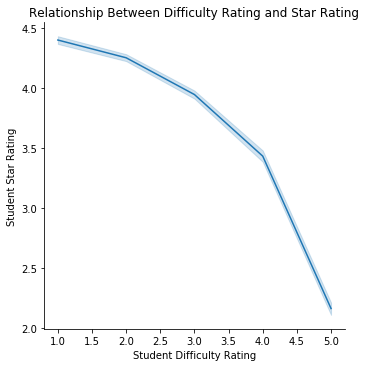

In [39]:
lineplot = sns.relplot(x="student_difficult", y="student_star", data = all_data, kind= "line")
lineplot.set(xlabel='Student Difficulty Rating', ylabel='Student Star Rating', title='Relationship Between Difficulty Rating and Star Rating')

Visualization 1 Analysis:
    We decided to compare the student difficulty rating and the amount of stars overall the student gave the professor. We thought that these two would have a correlation because the easier the class, the less amount of work the class has. Usually, the easier and less work a class is means students are more satisfied with the class, so they will rate the professor higher. This was found to be true as these two variables have a fairly strong negative exponential correlation. 

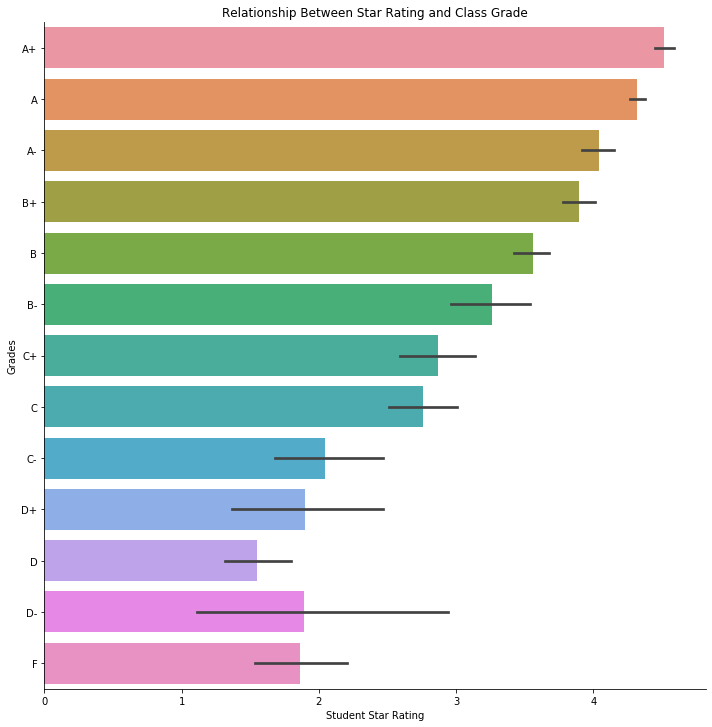

In [42]:
grades_vis = all_data.copy()
allowed_grades=["A+", "A", "A-","B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F"]
grades_vis = grades_vis[grades_vis["grades"].isin(allowed_grades)]
barplot = sns.catplot(x="student_star", y= "grades", data=grades_vis, kind ="bar", height=10, order=allowed_grades)
barplot.set(xlabel='Student Star Rating', ylabel='Grades', title='Relationship Between Star Rating and Class Grade')

Visualization 2 Analysis:
    We decided to also compare the student grade in the class and the amount of star ratings the student gave. We figured that the lower the student grades, the lower the students rating of the class would be on average. This is found to be true and on average for each grade level the higher the student grade the higher the rating. The only discrepancy came in the F-D range where this makes sense because the difference in student satisfaction at the lower grades is marginal.  

# Hypothesis Test

This section should contain at least one hypothesis test about the data. The skills you learned for this section primarily came from Module 3B.

The null hypothesis is that the average student star rating given by students who received an A- or higher is equal to the average student star rating given by students who received a grade between a B- and a B+. The alternative hypothesis is that the average student star rating given by students who received an A- or higher is greater than the average student star rating given by students who received a a grade between a B- and a B+ (one-sided test).

In [85]:
from scipy import stats
allowed_grades=["A+", "A", "A-"]
allowed_grades2=["B+", "B", "B-"]
good_grades = grades_vis[grades_vis['grades'].isin(allowed_grades)]
bad_grades = grades_vis[grades_vis['grades'].isin(allowed_grades2)]

test_results = stats.ttest_ind_from_stats(mean1=np.mean(good_grades['student_star']), std1=np.std(good_grades['student_star']), nobs1=len(good_grades),
                                          mean2=np.mean(bad_grades['student_star']), std2=np.std(bad_grades['student_star']), nobs2=len(bad_grades))
# Divide by 2 since ttest_ind_from_stats uses a two-sided test
test_results[1]/2

7.102103151341108e-50

Using a one-sided t test a p-value of about 7.102e-50 was calculated. This is less than the significance level of 0.05 so we can reject the null hypothesis and thus can conclude that the average student star rating given by students who received an A- or higher is greater than the average student star rating given by students who received a a grade between a B- and a B+.

# Prediction

This section should contain the creation and testing of at least one model. The skills you learned for this section primarily came from Module 6.

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Write your code for question 2 here
# and store your results in the correct variable names for full credit

data = np.append(OneHotEncoder().fit_transform(grades_vis[['grades']].values).toarray(),
          grades_vis[['student_difficult']], axis=1)

linear_model = LinearRegression()
train_data, test_data, train_target, test_target = train_test_split(data, grades_vis['student_star'], 
                                                                    test_size=0.25, 
                                                                    random_state=33)
linear_model.fit(X=train_data, y=train_target)

q2_mse = mean_squared_error(test_target.values,
                            linear_model.predict(test_data)) # float: MSE
q2_r2 = r2_score(test_target.values,
                 linear_model.predict(test_data)) # float: R^2 score


# Leave this line here to print the result
print("MSE:", q2_mse, "r^2:", q2_r2)

MSE: 1.1827980760746777 r^2: 0.2914647560355479


# Additional Analysis

This section should contain one more analysis of your choosing. It can be like any of the other analysis sections.

The null hypothesis is that the average student star rating given by students who rated the difficulty of a professor to be a 5 is equal to the average student star rating given by students who rated the difficulty of a professor to be a 4. The alternative hypothesis is that the average student star rating given by students who rated the difficulty of a professor to be a 5 is less than the average student star rating given by students who rated the difficulty of a professor to be a 4 (one-sided test).

In [98]:
from scipy import stats
good_grades = all_data[all_data['student_difficult'] == 1]
bad_grades = all_data[all_data['student_difficult'] == 2]

test_results = stats.ttest_ind_from_stats(mean1=np.mean(good_grades['student_star']), std1=np.std(good_grades['student_star']), nobs1=len(good_grades),
                                          mean2=np.mean(bad_grades['student_star']), std2=np.std(bad_grades['student_star']), nobs2=len(bad_grades))
# Divide by 2 since ttest_ind_from_stats uses a two-sided test
test_results[1]/2

5.3755021565823274e-11

Using a one-sided t test a p-value of about 5.376e-11 was calculated. This is less than the significance level of 0.05 so we can reject the null hypothesis and thus can conclude that the average student star rating given by students who rated the difficulty of a professor to be a 5 is lower than the average student star rating given by students who rated the difficulty of a professor to be a 4.

# Conclusion

*Add text here if you want to be considered for the last few points assessing the overall cohesion of your sections and an effective concluding summary.*